# 0. Introdução

**Trabalho**:

Aluno: Maicon Dall'Agnol

R.A.: 151161868

Disciplina: Tópico em Aprendizado de Máquina

**Objetivos** :

- Escolha dois conjuntos de dados para trabalhar o problema de regressão. Separe cada dataset em conjunto de treinamento e conjunto de teste. Explique o seu critério de separação e o método utilizado.
- Você deverá implementar soluções para cada dataset usando:
- - regressão linear (ou regressão múltipla)
- - regressão polinomial
- - SVR (use os kernels linear, sigmoide, RBF e polinomial)
- - rede neural (MLP ou RBF). 
- Descreva os parâmetros/arquiteturas de cada modelo.
- Compare os resultados (para treinamento e teste) com as medidas de desempenho SEQ, EQM, REQM, EAM e r², e verifique qual a melhor opção dentre os métodos implementados que melhor se ajusta a seus dados.
- Você deverá fazer a visualização dos dados originais com os dados ajustados em cada experimento, tanto para o conjunto de treinamento quanto para o de teste. Os gráficos devem conter títulos nos eixos e legenda. Comente os resultados encontrados na visualização.

## 0.1 Dependências

Para realização da tarefa foram utilizados as seguintes bibliotecas:

In [1]:
#Utils
import pandas as pd
import numpy as np
import pandas_profiling
import math

#Preprocess
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Split
from sklearn.model_selection import train_test_split

# Regressores
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

#Metricas
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Visualização
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Dados

Histórico de tempo em Szeged, Hungria - de 2006 a 2016

Fonte: https://www.kaggle.com/budincsevity/szeged-weather

## 1.1 Informações sobre os dados:

#### Atributos:
- time
- summary
- precipType
- temperature
- apparentTemperature
- humidity
- windSpeed
- windBearing
- visibility
- loudCover
- pressure

## Importando Dataset

In [2]:
data = pd.read_csv('dados/weatherHistory.csv')

In [3]:
data = data.sample(10000).reset_index(drop=True,)

In [4]:
pandas_profiling.ProfileReport(data)

Number of variables,12
Number of observations,10000
Total Missing (%),0.0%
Total size in memory,937.6 KiB
Average record size in memory,96.0 B
Numeric,6
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [5]:
data_raw = data.copy()

In [6]:
data_raw.drop(columns=['Formatted Date','Precip Type','Loud Cover','Apparent Temperature (C)','Summary','Visibility (km)','Pressure (millibars)','Daily Summary','Wind Bearing (degrees)'], inplace = True)

## Visualização

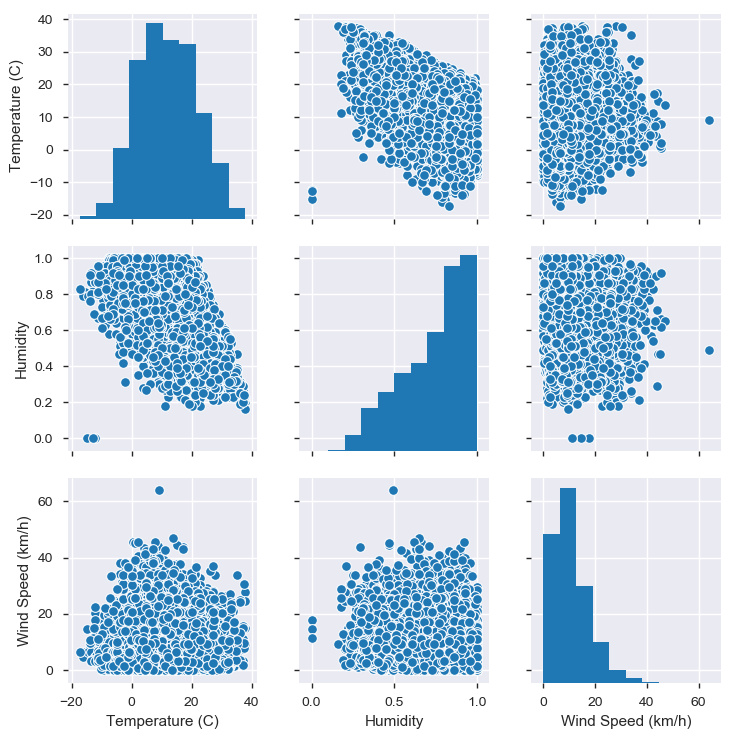

In [7]:
sns.pairplot(data_raw)

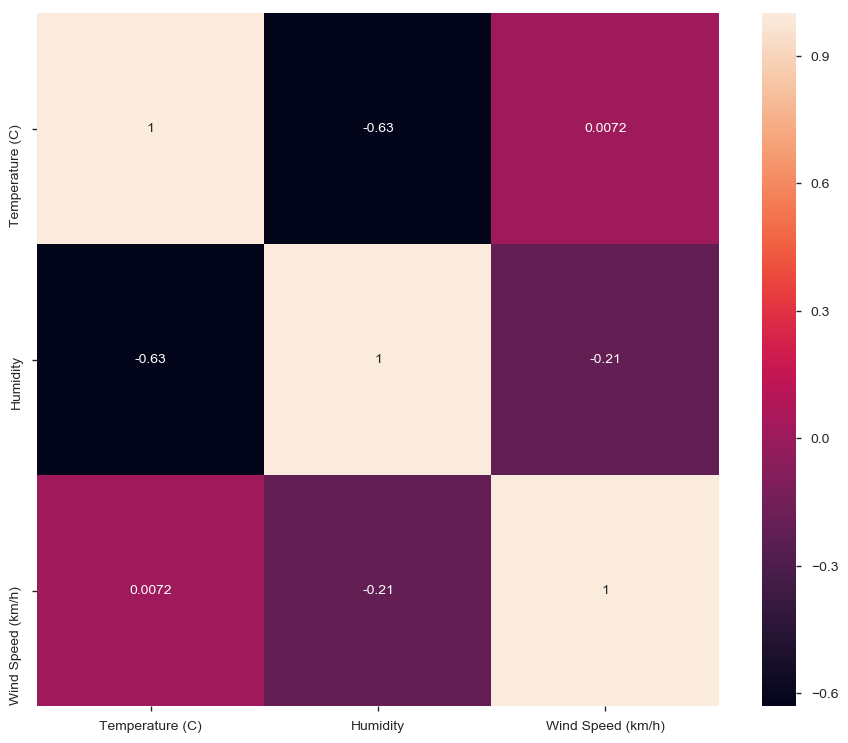

In [8]:
plt.subplots(figsize=(11, 9))
sns.heatmap(data_raw.corr(), annot=True)

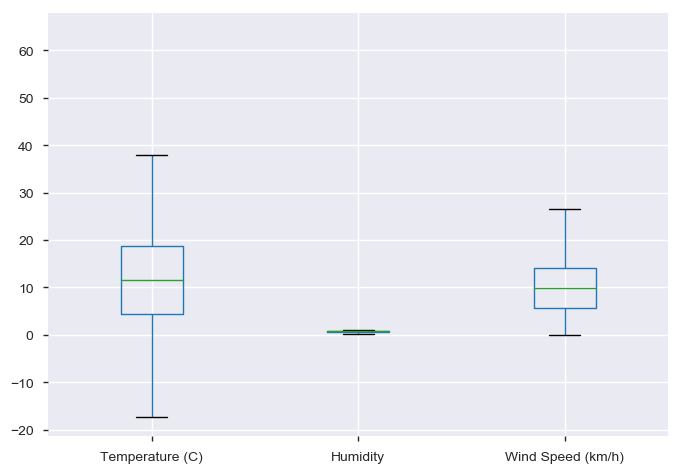

In [9]:
data_raw.plot.box()

## Escalonando

In [10]:
scaler = StandardScaler().fit(data_raw)
data_scaled = scaler.transform(data_raw)

In [11]:
data_scaled_df = pd.DataFrame(data_scaled, columns=data_raw.columns)

In [12]:
data_scaled_df.head()

,Temperature (C),Humidity,Wind Speed (km/h)
0,0.214510,0.681941,-1.081307
1,-0.468636,0.630496,0.058355
2,0.043288,-0.089742,0.775576
3,0.083917,-1.941780,0.694337
4,-0.205129,0.784832,-0.617086


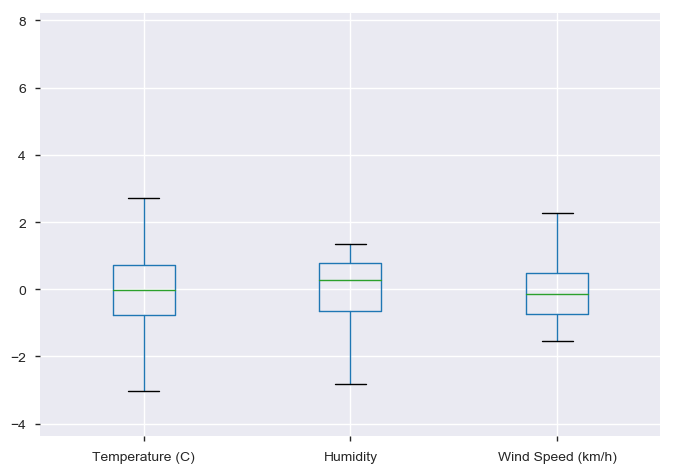

In [13]:
data_scaled_df.plot.box()

## Utilidades

In [14]:
lista_metricas_treino = []
lista_metricas_teste = []

In [15]:
def metricas(y_true, y_pred, alg):
    r2 = r2_score(y_true, y_pred)
    eqm = mean_squared_error(y_true, y_pred)
    seq = len(y_true)*eqm
    reqm = math.sqrt(eqm)
    
    return {'Algoritmo':alg, 'R2':r2, 'EQM':eqm, 'REQM':reqm, 'SEQ':seq}

## Separando conjuntos de Treino e Teste

Para a separação utilizou-se do train_test_split que divide o conjunto em treino e teste aleatóriamente

In [16]:
train, test = train_test_split(data_scaled_df, test_size = 0.2, shuffle=True)

x_train = train.drop(columns=['Temperature (C)'])
y_train = train['Temperature (C)']

x_test = test.drop(columns=['Temperature (C)'])
y_test = test['Temperature (C)']

## Aplicando a Regressão

### Regressão Linear

In [17]:
lire = LinearRegression()

In [18]:
lire.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Avaliação para Teste

In [19]:
y_pred = lire.predict(x_test)
linear_metricas = metricas(y_test, y_pred, 'Regressão Linear - Teste')
lista_metricas_teste.append(linear_metricas)

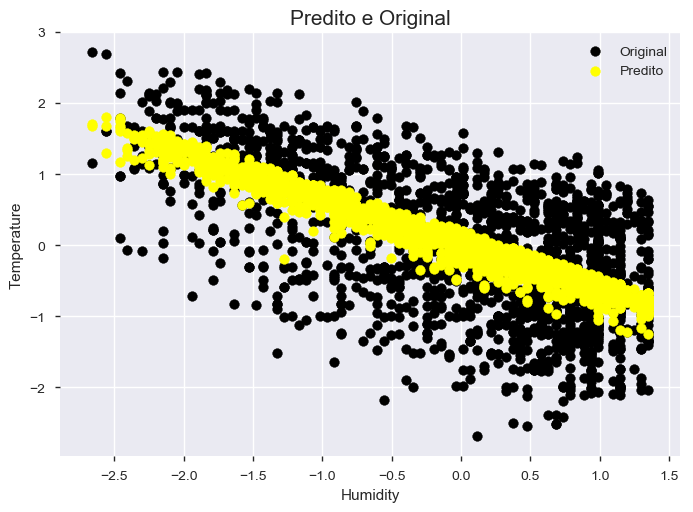

In [20]:
plt.scatter(x_test['Humidity'], y_test,  color='black')
plt.scatter(x_test['Humidity'], y_pred, color='yellow')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [21]:
y_pred = lire.predict(x_train)
linear_metricas = metricas(y_train, y_pred, 'Regressão Linear - Treino')
lista_metricas_treino.append(linear_metricas)

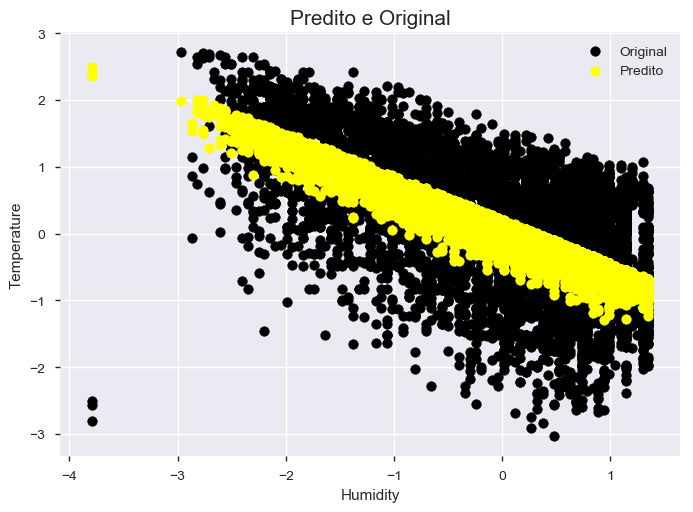

In [22]:
plt.scatter(x_train['Humidity'], y_train,  color='black')
plt.scatter(x_train['Humidity'], y_pred, color='yellow')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## SVR

### Kernel RBF

In [23]:
svr_reg = SVR(kernel='rbf')

In [24]:
svr_reg.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

## Avaliação para Teste

In [25]:
y_pred = svr_reg.predict(x_test)
svr_metricas = metricas(y_test, y_pred, 'SVR - RBF - Teste')
lista_metricas_teste.append(svr_metricas)

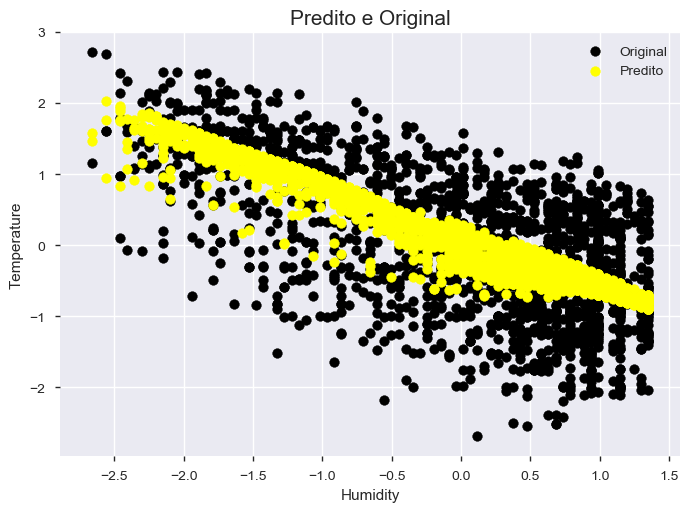

In [26]:
plt.scatter(x_test['Humidity'], y_test,  color='black')
plt.scatter(x_test['Humidity'], y_pred, color='yellow')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [27]:
y_pred = svr_reg.predict(x_train)
svr_metricas = metricas(y_train, y_pred, 'SVR - RBF - Treino')
lista_metricas_treino.append(svr_metricas)

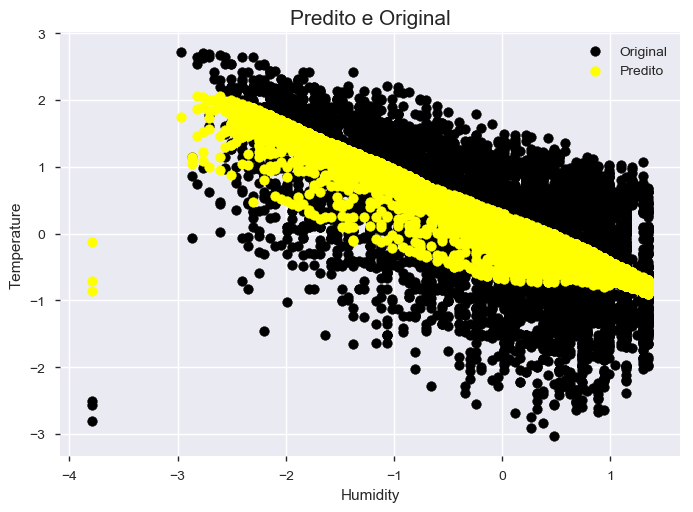

In [28]:
plt.scatter(x_train['Humidity'], y_train,  color='black')
plt.scatter(x_train['Humidity'], y_pred, color='yellow')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

### Kernel Linear

In [29]:
svr_reg = SVR(kernel='linear')

In [30]:
svr_reg.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

## Avaliação para Teste

In [31]:
y_pred = svr_reg.predict(x_test)
metricas_svr = metricas(y_test, y_pred, 'SVR - Linear - Teste')
lista_metricas_teste.append(metricas_svr)

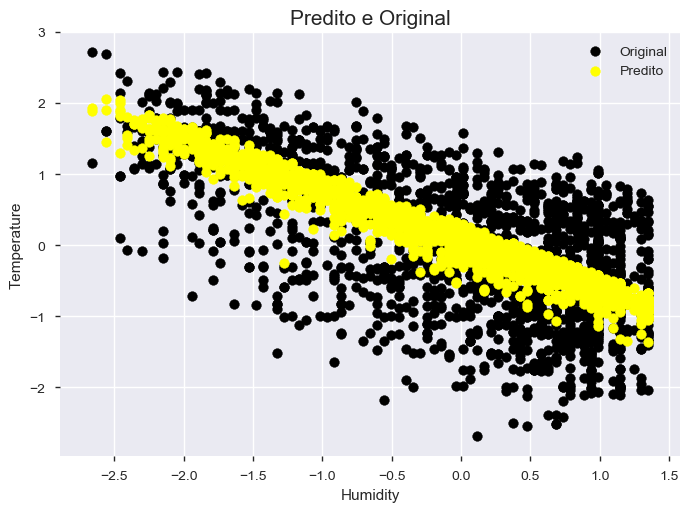

In [32]:
plt.scatter(x_test['Humidity'], y_test,  color='black')
plt.scatter(x_test['Humidity'], y_pred, color='yellow')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [33]:
y_pred = svr_reg.predict(x_train)
svr_metricas = metricas(y_train, y_pred, 'SVR - Linear - Treino')
lista_metricas_treino.append(svr_metricas)

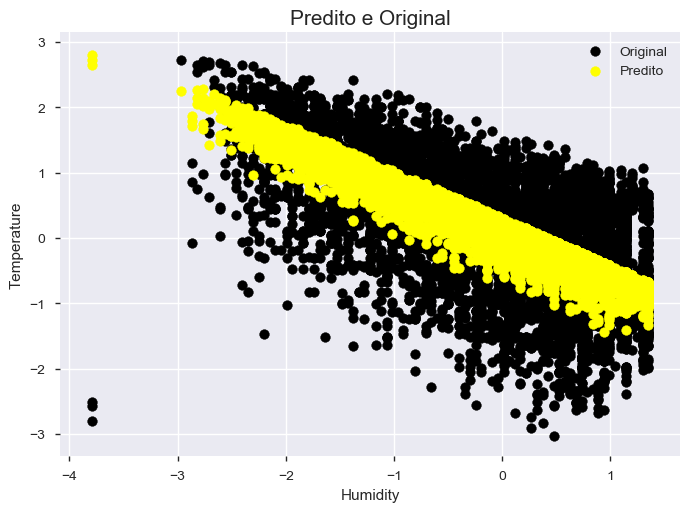

In [34]:
plt.scatter(x_train['Humidity'], y_train,  color='black')
plt.scatter(x_train['Humidity'], y_pred, color='yellow')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

### Kernel Sigmoide

In [35]:
svr_reg = SVR(kernel='sigmoid')

In [36]:
svr_reg.fit(x_train , y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='sigmoid', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

## Avaliação para Teste

In [37]:
y_pred  = svr_reg.predict(x_test)
metricas_svr = metricas(y_test , y_pred , 'SVR - Sigmoide - Teste')
lista_metricas_teste.append(metricas_svr)

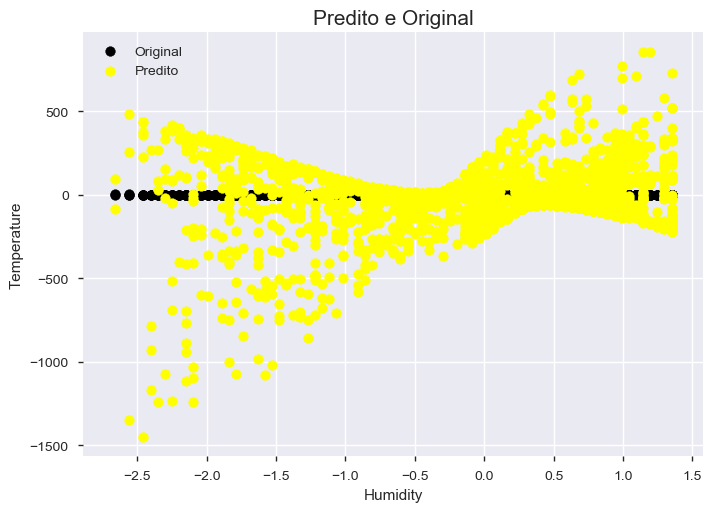

In [38]:
plt.scatter(x_test['Humidity'], y_test,  color='black')
plt.scatter(x_test['Humidity'], y_pred, color='yellow')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [39]:
y_pred = svr_reg.predict(x_train)
svr_metricas = metricas(y_train , y_pred , 'SVR - Sigmoide - Treino')
lista_metricas_treino.append(svr_metricas)

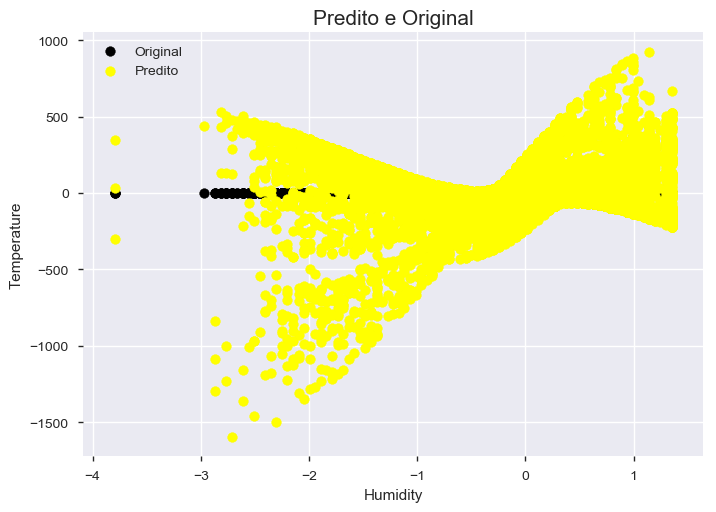

In [40]:
plt.scatter(x_train['Humidity'], y_train,  color='black')
plt.scatter(x_train['Humidity'], y_pred, color='yellow')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

### Kernel Polinomial

In [41]:
svr_reg = SVR(kernel='poly', degree=3)

In [42]:
svr_reg.fit(x_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

## Avaliação para Teste

In [43]:
y_pred = svr_reg.predict(x_test)
svr_metricas = metricas(y_test, y_pred, 'SVR - Polinomial - Teste')
lista_metricas_teste.append(svr_metricas)

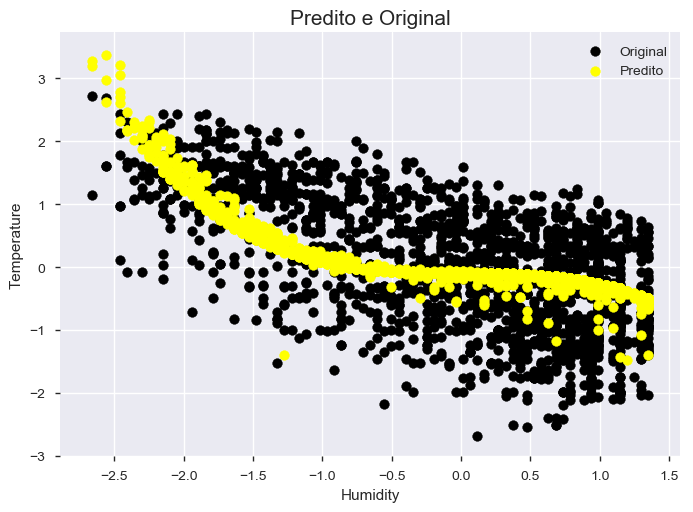

In [44]:
plt.scatter(x_test['Humidity'], y_test,  color='black')
plt.scatter(x_test['Humidity'], y_pred, color='yellow')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [45]:
y_pred = svr_reg.predict(x_train)
svr_metricas = metricas(y_train, y_pred, 'SVR - Polinomial - Treino')
lista_metricas_treino.append(svr_metricas)

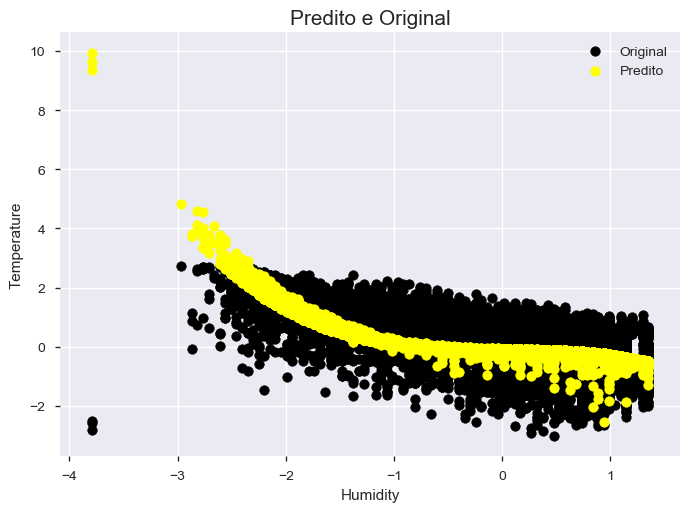

In [46]:
plt.scatter(x_train['Humidity'], y_train,  color='black')
plt.scatter(x_train['Humidity'], y_pred, color='yellow')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Redes Neurais

### Kernel Linear

In [47]:
mlp_reg = MLPRegressor()

In [48]:
mlp_reg.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## Avaliação para Teste

In [49]:
y_pred = mlp_reg.predict(x_test)
mlp_metricas = metricas(y_test, y_pred, 'MLP - Teste')
lista_metricas_teste.append(mlp_metricas)

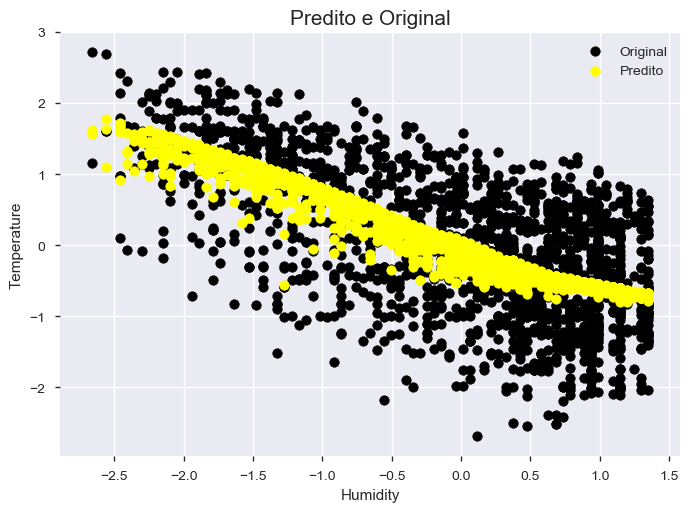

In [50]:
plt.scatter(x_test['Humidity'], y_test,  color='black')
plt.scatter(x_test['Humidity'], y_pred, color='yellow')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

## Avaliação para Treino

In [51]:
y_pred = mlp_reg.predict(x_train)
mlp_metricas = metricas(y_train, y_pred, 'MLP - Treino')
lista_metricas_treino.append(mlp_metricas)

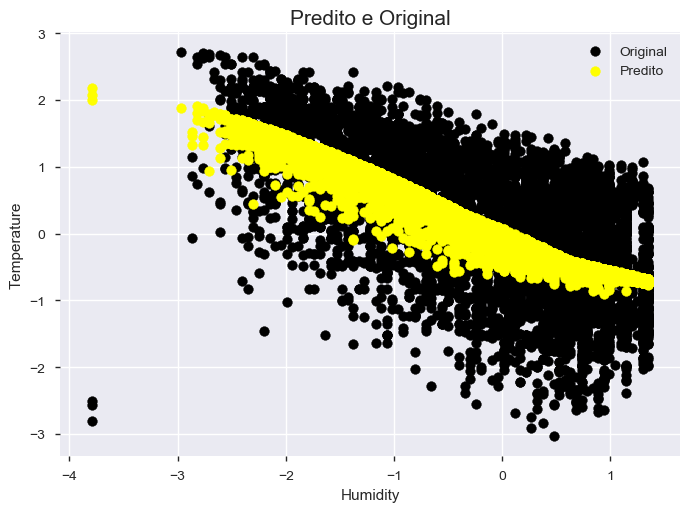

In [52]:
plt.scatter(x_train['Humidity'], y_train,  color='black')
plt.scatter(x_train['Humidity'], y_pred, color='yellow')
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.title('Predito e Original',fontsize=15)
plt.legend(['Original', 'Predito'])
plt.show()

# Resultados

In [63]:
metricas_teste = pd.DataFrame(lista_metricas_teste)
metricas_teste

,Algoritmo,EQM,R2,REQM,SEQ
0,Regressão Linear - Teste,0.592699,0.405625,0.769870,1.185398e+03
1,SVR - RBF - Teste,0.599608,0.398697,0.774343,1.199215e+03
2,SVR - Linear - Teste,0.601256,0.397044,0.775407,1.202513e+03
3,SVR - Sigmoide - Teste,51226.694361,-51370.514410,226.333149,1.024534e+08
4,SVR - Polinomial - Teste,0.697636,0.300392,0.835246,1.395272e+03
5,MLP - Teste,0.583083,0.415269,0.763599,1.166166e+03


In [65]:
metricas_teste = round(metricas_teste, 3)

In [66]:
metricas_teste

,Algoritmo,EQM,R2,REQM,SEQ
0,Regressão Linear - Teste,0.593,0.406,0.770,1.185398e+03
1,SVR - RBF - Teste,0.600,0.399,0.774,1.199215e+03
2,SVR - Linear - Teste,0.601,0.397,0.775,1.202513e+03
3,SVR - Sigmoide - Teste,51226.694,-51370.514,226.333,1.024534e+08
4,SVR - Polinomial - Teste,0.698,0.300,0.835,1.395272e+03
5,MLP - Teste,0.583,0.415,0.764,1.166166e+03


In [67]:
metricas_teste.to_excel('regressao2_metricas_teste.xlsx')

In [68]:
metricas_treino = pd.DataFrame(lista_metricas_treino)
metricas_treino

,Algoritmo,EQM,R2,REQM,SEQ
0,Regressão Linear - Treino,0.584740,0.415589,0.764683,4.677922e+03
1,SVR - RBF - Treino,0.577293,0.423032,0.759798,4.618342e+03
2,SVR - Linear - Treino,0.592106,0.408227,0.769484,4.736851e+03
3,SVR - Sigmoide - Treino,52816.201340,-52785.446344,229.817757,4.225296e+08
4,SVR - Polinomial - Treino,0.755123,0.245303,0.868978,6.040982e+03
5,MLP - Treino,0.574974,0.425350,0.758270,4.599792e+03


In [69]:
metricas_treino = round(metricas_treino, 3)

In [70]:
metricas_treino.to_excel('regressao2_metricas_treino.xlsx')